In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
inputs=df.drop(['Survived','PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
target=df['Survived']

In [18]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
inputs['sex_n']=le_sex.fit_transform(inputs['Sex'])
inputs=inputs.drop(['Sex'],axis='columns')

In [19]:
inputs

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [20]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [23]:
X_train

,Pclass,Age,Fare,sex_n
699,3,42.0,7.6500,1
97,1,23.0,63.3583,1
796,1,49.0,25.9292,0
866,2,27.0,13.8583,0
126,3,NaN,7.7500,1
...,...,...,...,...
398,2,23.0,10.5000,1
733,2,23.0,13.0000,1
568,3,NaN,7.2292,1
437,2,24.0,18.7500,0


In [24]:
X_test

,Pclass,Age,Fare,sex_n
183,2,1.0,39.0000,1
108,3,38.0,7.8958,1
455,3,29.0,7.8958,1
624,3,21.0,16.1000,1
550,1,17.0,110.8833,1
...,...,...,...,...
712,1,48.0,52.0000,1
216,3,27.0,7.9250,0
478,3,22.0,7.5208,1
130,3,33.0,7.8958,1


In [25]:
y_train

,Survived
699,0
97,1
796,1
866,1
126,0
...,...
398,0
733,0
568,0
437,1


In [26]:
y_test

,Survived
183,1
108,0
455,1
624,0
550,1
...,...
712,1
216,1
478,0
130,0


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
model.predict(X_test)

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1])

In [31]:
model.score(X_test,y_test)

0.7541899441340782

In [41]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from seaborn import heatmap
import seaborn as sn

In [35]:
y_predicted = model.predict(X_test)

In [36]:
cm = confusion_matrix(y_test, y_predicted)
cm


array([[92, 19],
       [25, 43]])

Text(95.72222222222221, 0.5, 'Truth')

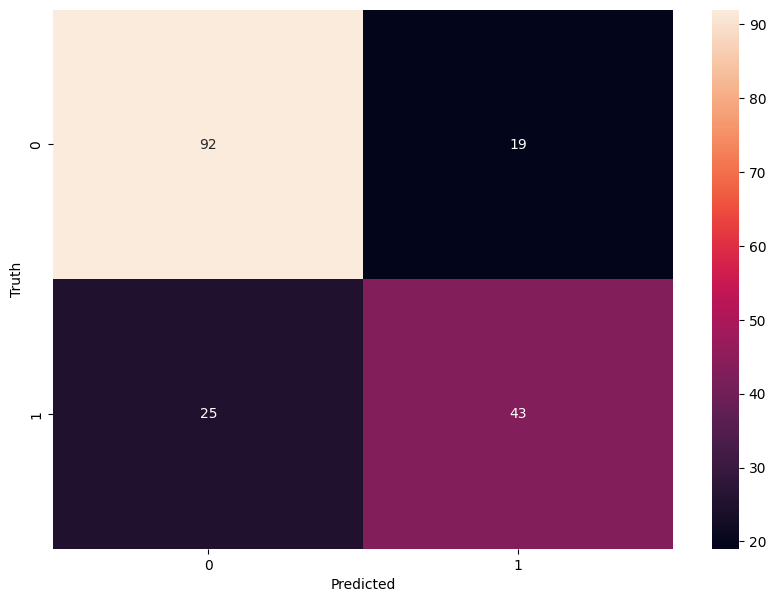

In [39]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

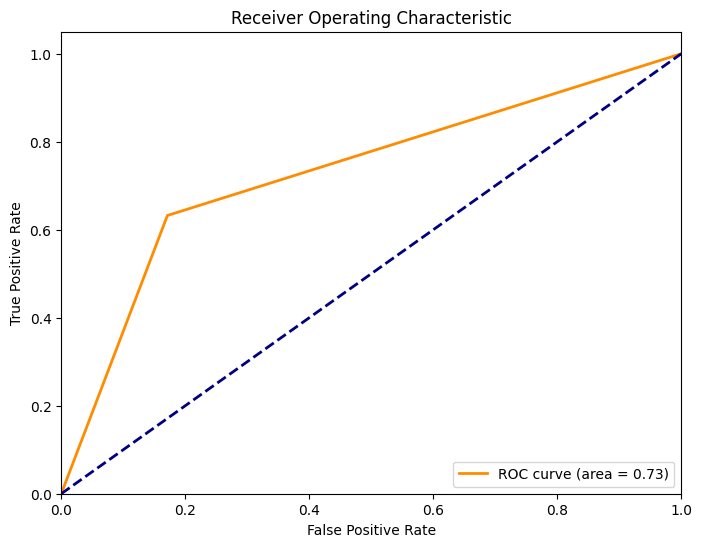

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

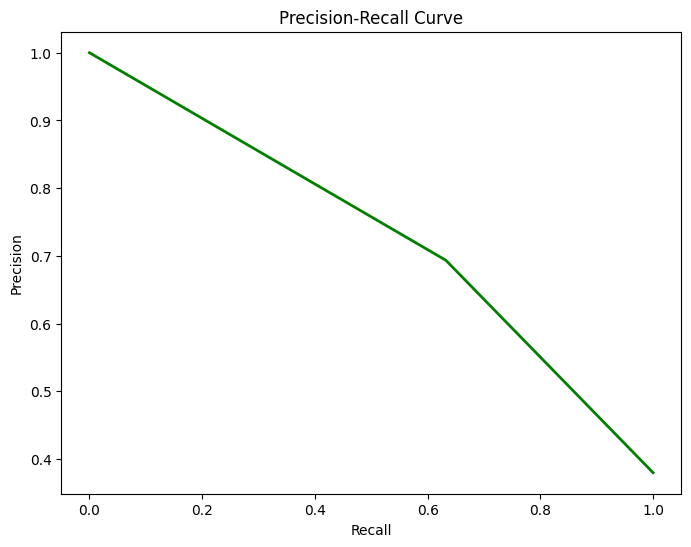

In [43]:
precision, recall, _ = precision_recall_curve(y_test, y_predicted)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, lw=2, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()